In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("/media/midhu262/01D396A46A88F5C0/concrete_strength_prediction/artifacts/data_ingestion/concrete_data.csv")

In [4]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.shape

(1030, 9)

In [6]:
df.columns.values

array(['cement', 'blast_furnace_slag', 'fly_ash', 'water',
       'superplasticizer', 'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'], dtype=object)

In [7]:
df.dtypes

cement                           float64
blast_furnace_slag               float64
fly_ash                          float64
water                            float64
superplasticizer                 float64
coarse_aggregate                 float64
fine_aggregate                   float64
age                                int64
concrete_compressive_strength    float64
dtype: object

In [8]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


fly_ash and age are skewed

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [10]:
df['super_plasticizer'].value_counts()

KeyError: 'super_plasticizer'

In [ ]:
df.rename(columns={'superplasticizer': 'super_plasticizer'}, inplace=True)

In [ ]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,super_plasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Data Exploration

<Axes: >

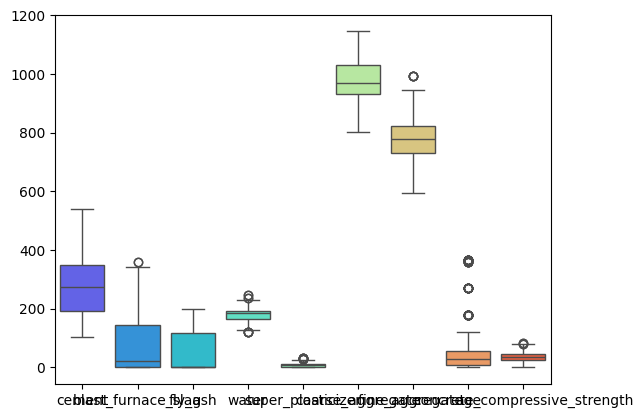

In [ ]:
sns.boxplot(data = df, palette = "rainbow")

Text(0.5, 1.0, 'concrete_compressive_strength vs age')

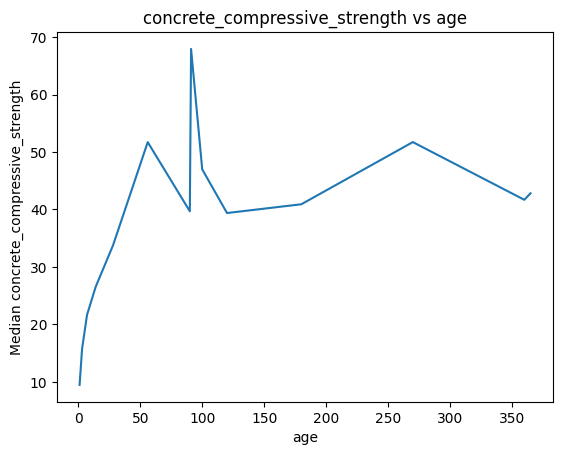

In [ ]:
df.groupby('age')['concrete_compressive_strength'].median().plot()
plt.xlabel('age')
plt.ylabel('Median concrete_compressive_strength')
plt.title("concrete_compressive_strength vs age")

In [ ]:
df.groupby('age')['concrete_compressive_strength'].median()

age
1       9.455
3      15.720
7      21.650
14     26.540
28     33.760
56     51.720
90     39.680
91     67.950
100    46.985
120    39.380
180    40.905
270    51.730
360    41.685
365    42.815
Name: concrete_compressive_strength, dtype: float64

In [ ]:
df.loc[df['age'] == 56]

,cement,blast_furnace_slag,fly_ash,water,super_plasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
139,374.0,189.2,0.0,170.1,10.1,926.1,756.7,56,63.40
140,313.3,262.2,0.0,175.5,8.6,1046.9,611.8,56,64.90
141,425.0,106.3,0.0,153.5,16.5,852.1,887.1,56,64.30
142,425.0,106.3,0.0,151.4,18.6,936.0,803.7,56,64.90
143,375.0,93.8,0.0,126.6,23.4,852.1,992.6,56,60.20
...,...,...,...,...,...,...,...,...,...
518,202.0,11.0,141.0,206.0,1.7,942.0,801.0,56,23.25
522,284.0,15.0,141.0,179.0,5.5,842.0,801.0,56,44.52
529,359.0,19.0,141.0,154.0,10.9,942.0,801.0,56,68.75
530,359.0,19.0,141.0,154.0,10.9,942.0,801.0,56,66.78


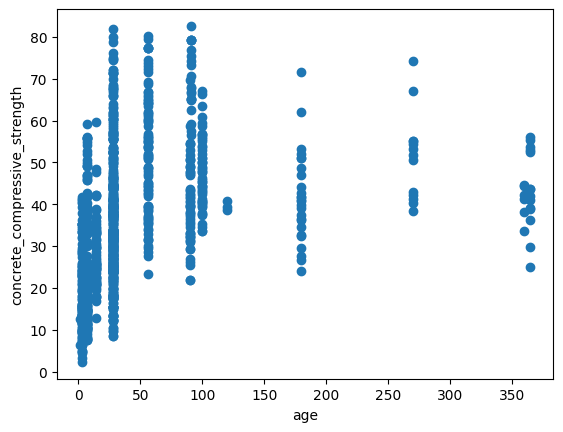

In [ ]:
plt.scatter(df['age'],df['concrete_compressive_strength'])
plt.xlabel('age')
plt.ylabel('concrete_compressive_strength')
plt.show()


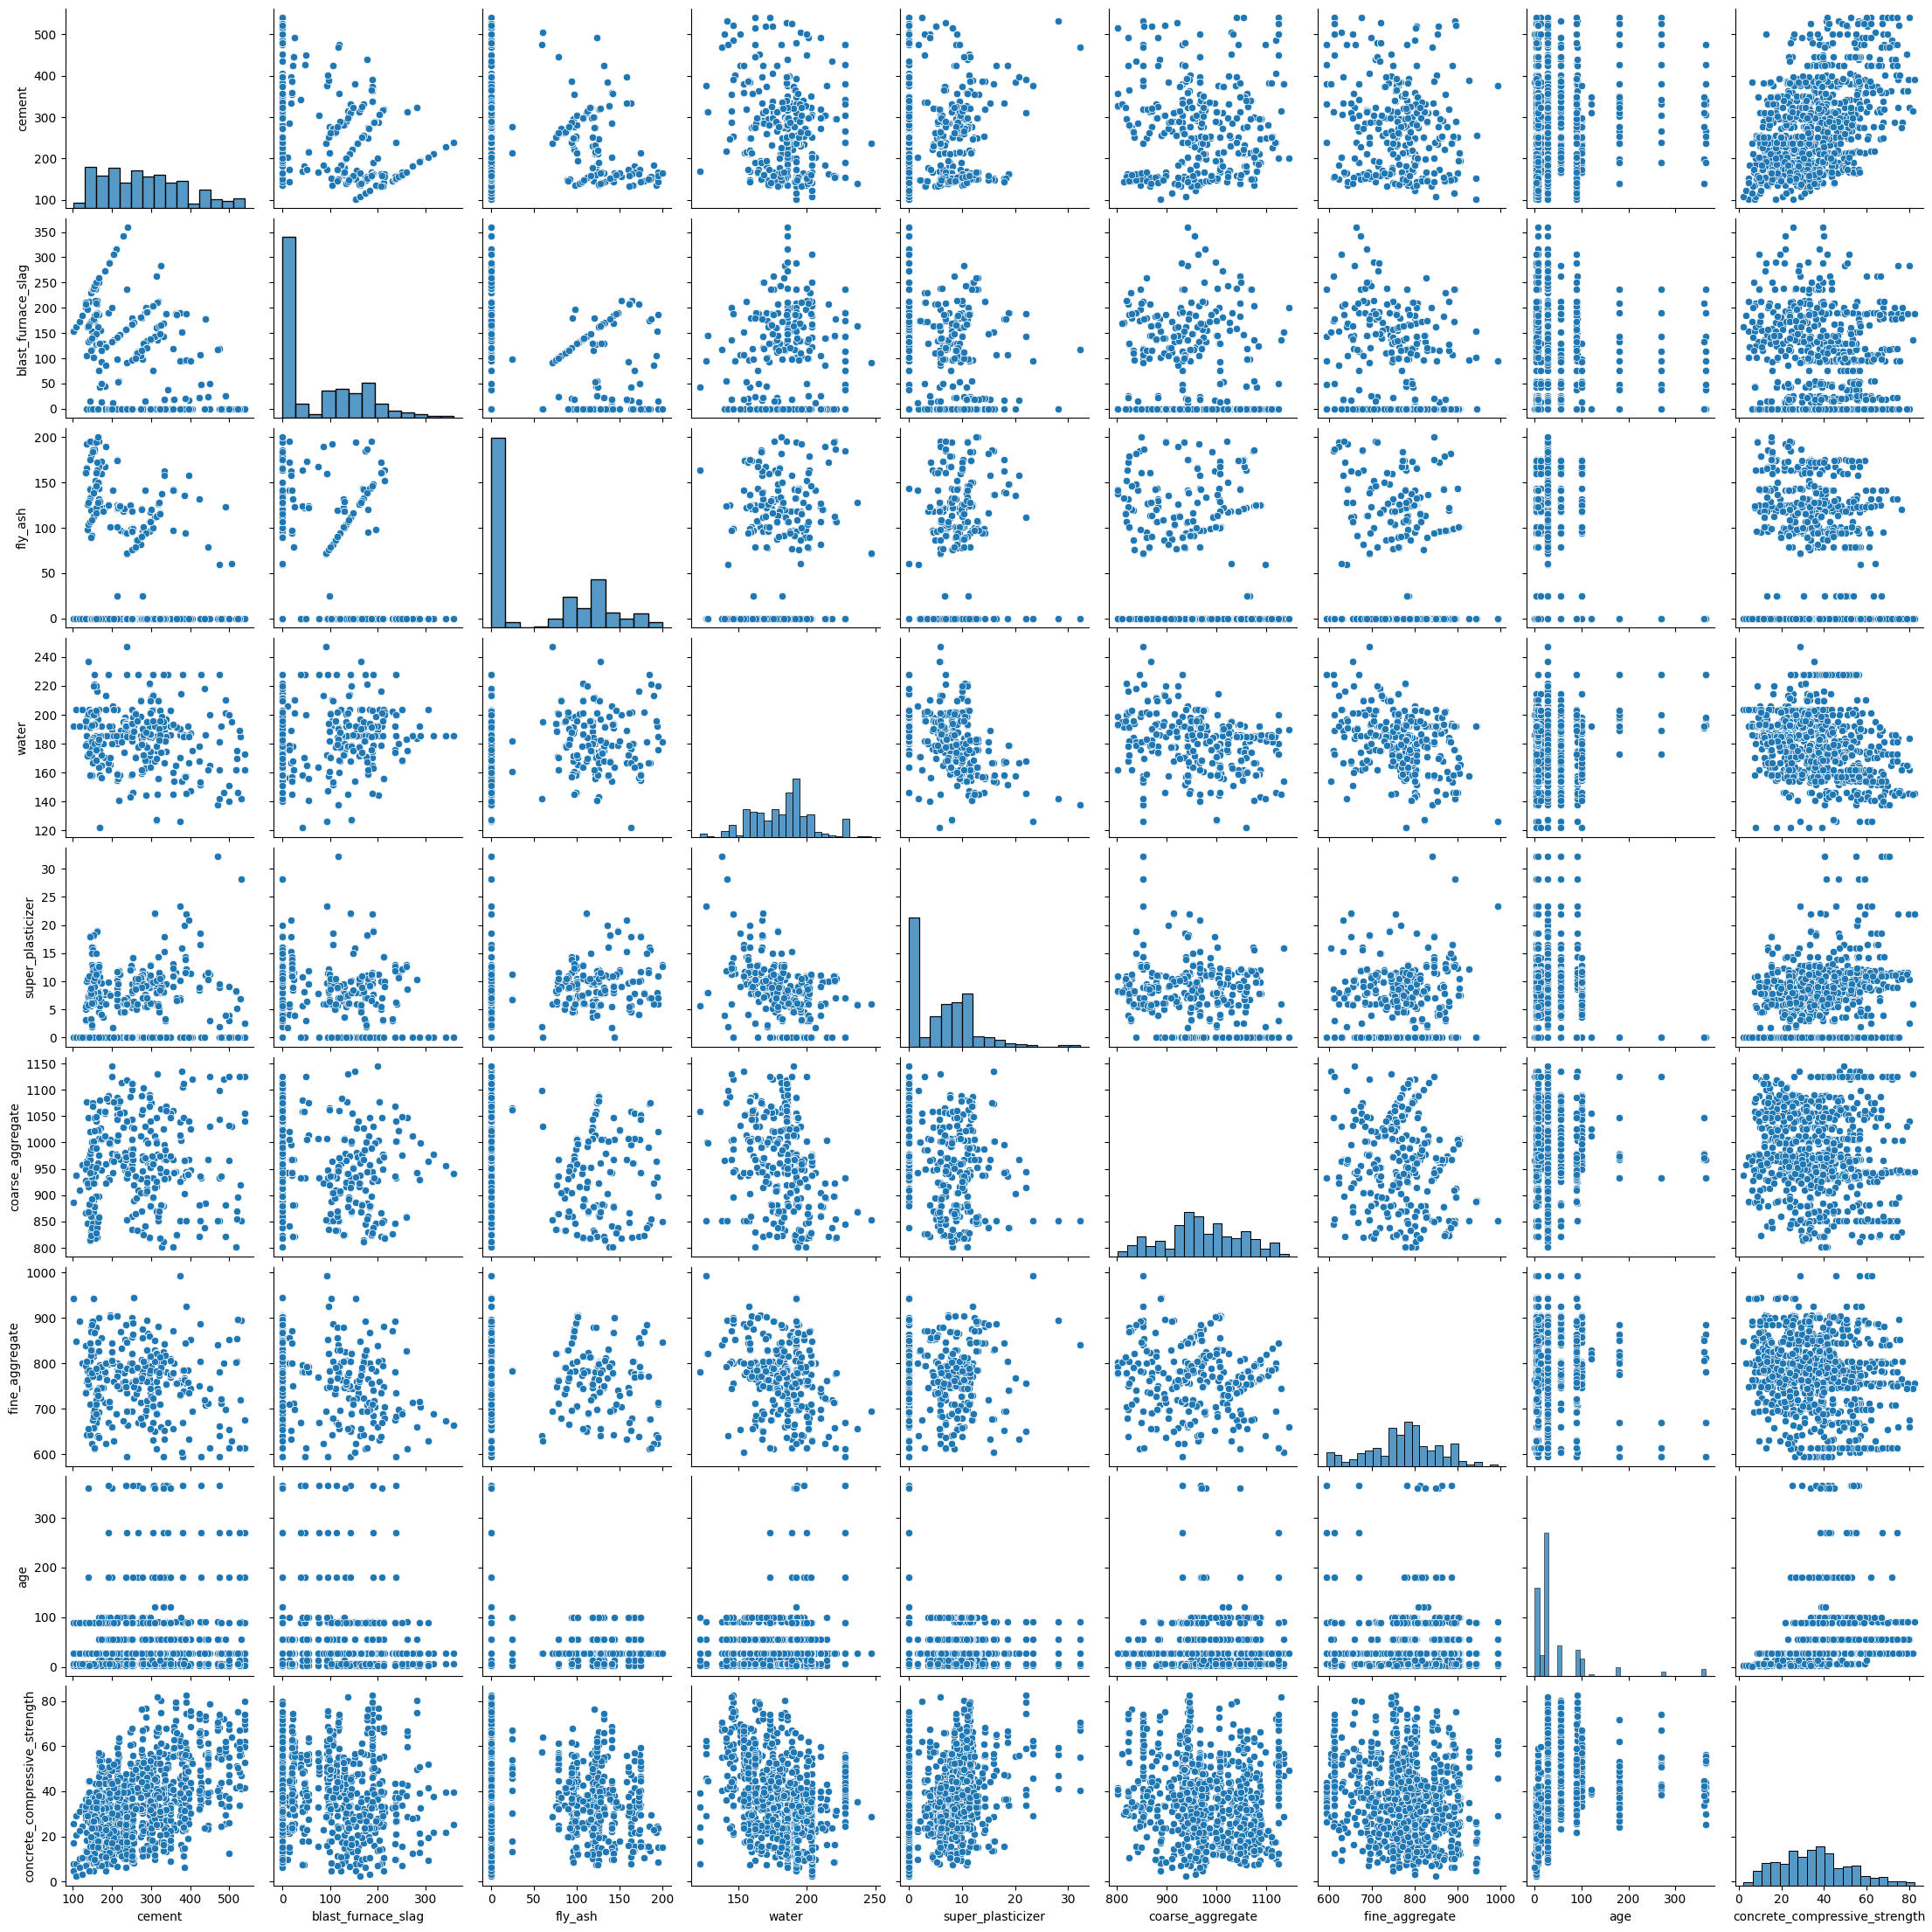

In [ ]:
sns.pairplot(df)

1. fly_ash and super_plasticizer are admixture, so more values are 0
2. compressive strength increase with age to a specific value and then remain constant

All features are numerical variables

In [ ]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in df if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))


Discrete Variables Count: 1


['age']

In [ ]:
continuous_feature=[feature for feature in df if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))
continuous_feature

Continuous feature Count 8


['cement',
 'blast_furnace_slag',
 'fly_ash',
 'water',
 'super_plasticizer',
 'coarse_aggregate',
 'fine_aggregate ',
 'concrete_compressive_strength']

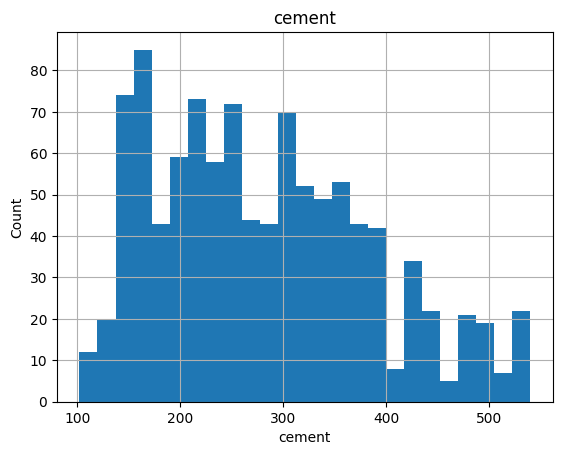

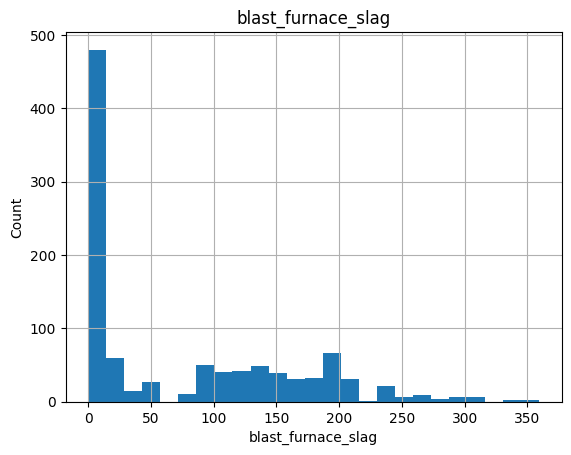

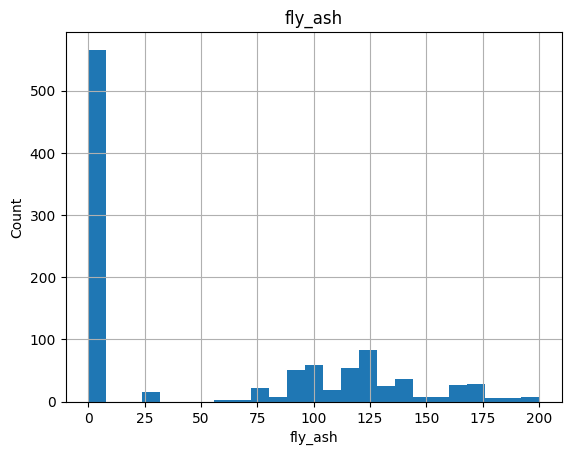

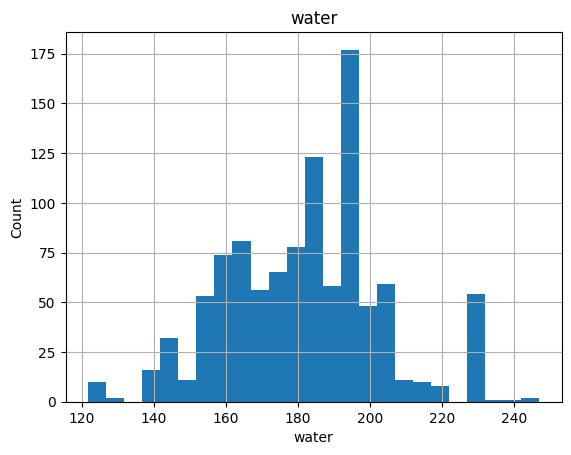

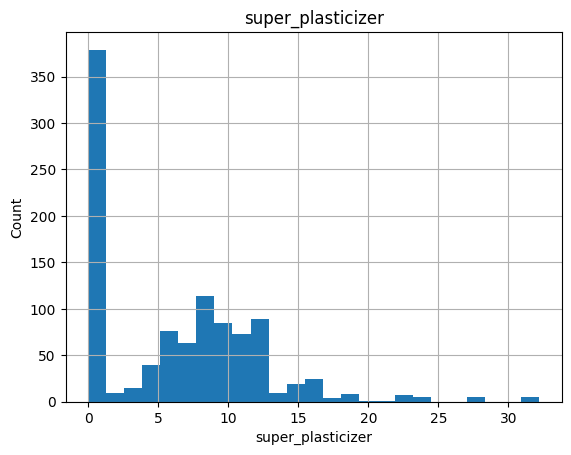

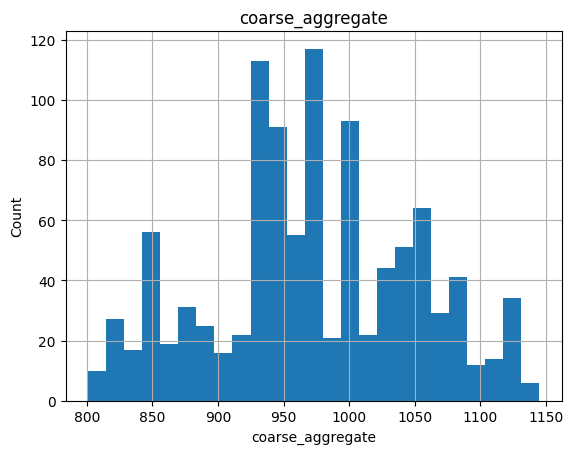

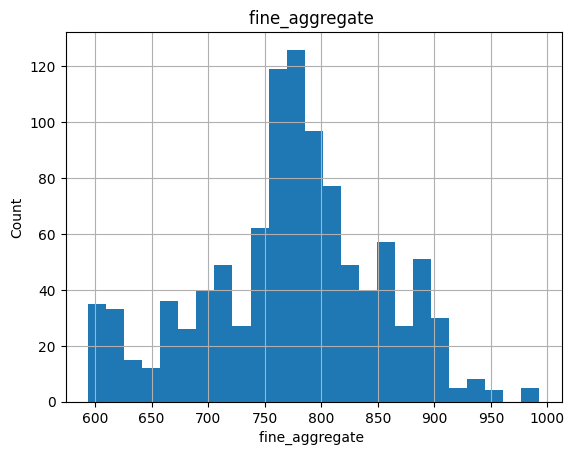

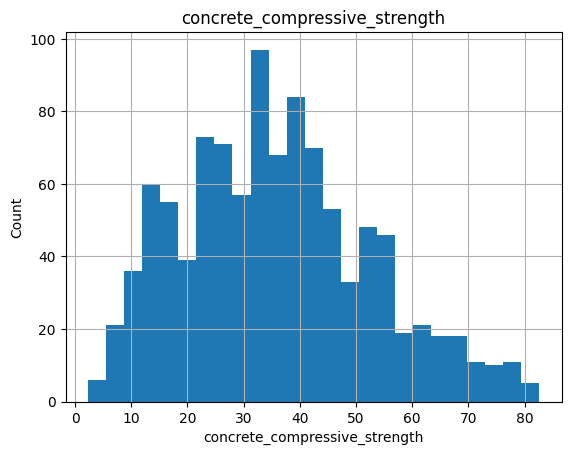

In [ ]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

Text(0.5, 1.0, 'concrete_compressive_strength vs blast_furnace_slag')

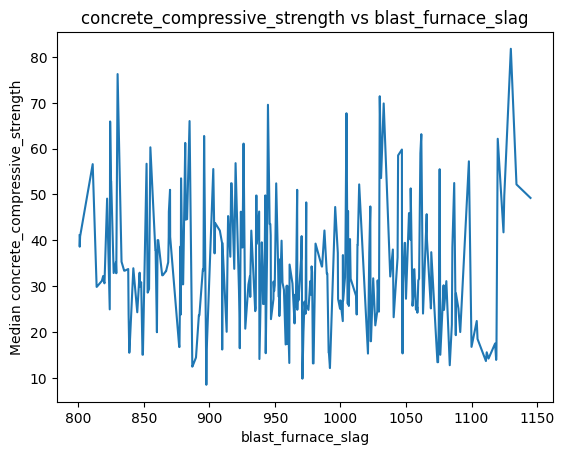

In [ ]:
df.groupby('coarse_aggregate')['concrete_compressive_strength'].median().plot()
plt.xlabel('blast_furnace_slag')
plt.ylabel('Median concrete_compressive_strength')
plt.title("concrete_compressive_strength vs blast_furnace_slag")

<Axes: >

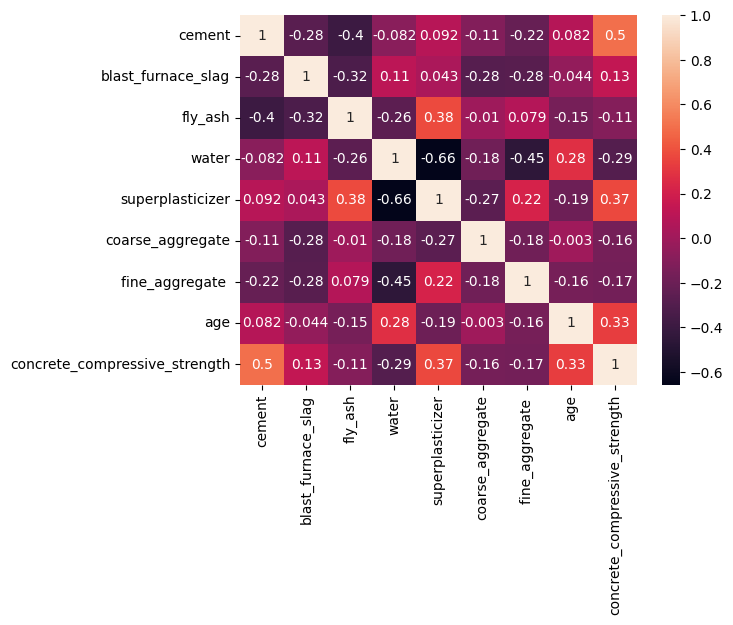

In [12]:
corr = df.corr()
sns.heatmap(corr, annot=True)